## Agents
## Agents helps to use multiple tools, tools are nothing but a way to query data from location like a website, or document etc. When we use Agents and multiple tools it lets the model use tools in a loop, so that it can decide how many times to use tools, so whichever tool providing most relevant information then that location is used for querying.

## 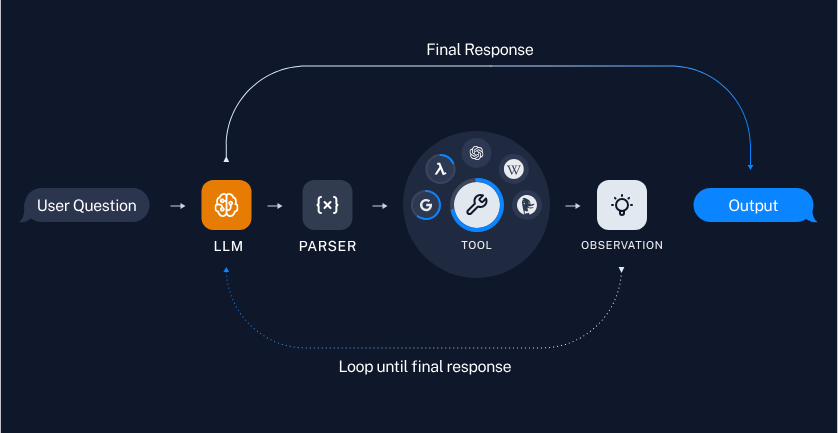

In [1]:
from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper

In [2]:
#tool no 1
api_wrapper=WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=200)
wiki=WikipediaQueryRun(api_wrapper=api_wrapper)

In [3]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import FAISS
from langchain_community.embeddings import OllamaEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter

loader=WebBaseLoader("https://docs.smith.langchain.com/")
docs=loader.load()
documents=RecursiveCharacterTextSplitter(chunk_size=1000,chunk_overlap=200).split_documents(docs)
vectordb=FAISS.from_documents(documents,OllamaEmbeddings())
retriever=vectordb.as_retriever()
retriever

USER_AGENT environment variable not set, consider setting it to identify your requests.


VectorStoreRetriever(tags=['FAISS', 'OllamaEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x000002C9BEF42F50>, search_kwargs={})

In [4]:
#tool no 2
#creating retrieval tool which will be helpful to retrieve documents
from langchain.tools.retriever import create_retriever_tool
retriever_tool = create_retriever_tool(retriever, "langsmith_search", 
                       "Search for information about LangSmith. For any questions about LangSmith, you must use this tool!")

In [5]:
## Arxiv Tool no 3
from langchain_community.utilities import ArxivAPIWrapper
from langchain_community.tools import ArxivQueryRun

arxiv_wrapper=ArxivAPIWrapper(top_k_results=1, doc_content_chars_max=200)
arxiv=ArxivQueryRun(api_wrapper=arxiv_wrapper)
arxiv.name

'arxiv'

In [6]:
#so when I query through agents it will first look the data in wiki if not found then arxiv and so on
tools = [wiki, arxiv, retriever_tool]

In [7]:
import getpass
import os

os.environ["MISTRAL_API_KEY"] = getpass.getpass()

In [8]:
#using mistral to create tool bcz llama2 cant do that
from langchain_mistralai import ChatMistralAI 

llm = ChatMistralAI(model="mistral-large-latest")

In [9]:
from langchain import hub
prompt = hub.pull("hwchase17/openai-functions-agent")
prompt.messages

[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='You are a helpful assistant'), additional_kwargs={}),
 MessagesPlaceholder(variable_name='chat_history', optional=True),
 HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['input'], input_types={}, partial_variables={}, template='{input}'), additional_kwargs={}),
 MessagesPlaceholder(variable_name='agent_scratchpad')]

In [10]:
#Agents
from langchain.agents import create_openai_tools_agent
agent = create_openai_tools_agent(llm, tools, prompt)

In [11]:
#Agent executer is required to run agent or to use agent
from langchain.agents import AgentExecutor
agent_executer = AgentExecutor(agent = agent, tools=tools, verbose= True)
agent_executer


AgentExecutor(verbose=True, agent=RunnableMultiActionAgent(runnable=RunnableAssign(mapper={
  agent_scratchpad: RunnableLambda(lambda x: format_to_openai_tool_messages(x['intermediate_steps']))
})
| ChatPromptTemplate(input_variables=['agent_scratchpad', 'input'], optional_variables=['chat_history'], input_types={'chat_history': list[typing.Annotated[typing.Union[typing.Annotated[langchain_core.messages.ai.AIMessage, Tag(tag='ai')], typing.Annotated[langchain_core.messages.human.HumanMessage, Tag(tag='human')], typing.Annotated[langchain_core.messages.chat.ChatMessage, Tag(tag='chat')], typing.Annotated[langchain_core.messages.system.SystemMessage, Tag(tag='system')], typing.Annotated[langchain_core.messages.function.FunctionMessage, Tag(tag='function')], typing.Annotated[langchain_core.messages.tool.ToolMessage, Tag(tag='tool')], typing.Annotated[langchain_core.messages.ai.AIMessageChunk, Tag(tag='AIMessageChunk')], typing.Annotated[langchain_core.messages.human.HumanMessageChunk, Tag

In [24]:
agent_executer.invoke({"input": "Tell me about langsmith."})



> Entering new AgentExecutor chain...

Invoking: `langsmith_search` with `{'query': 'langsmith'}`


Get started with LangSmith | 🦜️🛠️ LangSmith

score: run.outputs?.output === example?.outputs?.output,  };};await evaluate(  (input: { postfix: string }) => ({ output: `Welcome ${input.postfix}` }),  {    data: datasetName,    evaluators: [exactMatch],    metadata: {      version: "1.0.0",      revision_id: "beta",    },  });Learn more about evaluation in the how-to guides.Was this page helpful?You can leave detailed feedback on GitHub.NextTutorials1. Install LangSmith2. Create an API key3. Set up your environment4. Log your first trace5. Run your first evaluationCommunityDiscordTwitterGitHubDocs CodeLangSmith SDKPythonJS/TSMoreHomepageBlogLangChain Python DocsLangChain JS/TS DocsCopyright © 2024 LangChain, Inc.

= traceable(async (user_input) => {    const result = await client.chat.completions.create({        messages: [{ role: "user", content: user_input }],        model: "gpt-3.5-tu

{'input': 'Tell me about langsmith.',
 'output': "LangSmith is a platform that helps you to create, evaluate, and trace your AI models. You can learn more about it by visiting the [LangSmith website](https://langsmith.com). Here are some key features:\n\n1. **Install LangSmith:** You can install LangSmith to get started with its functionalities.\n2. **Create an API key:** Generate an API key to interact with the LangSmith platform.\n3. **Set up your environment:** Configure your development environment to use LangSmith.\n4. **Log your first trace:** Learn how to log traces of your AI model's behavior.\n5. **Run your first evaluation:** Evaluate your AI model using LangSmith's evaluation tools."}

In [26]:
agent_executer.invoke({"input": "Tell me about Machine Learning."})



> Entering new AgentExecutor chain...

Invoking: `wikipedia` with `{'query': 'Machine Learning'}`


Page: Machine learning
Summary: Machine learning (ML) is a field of study in artificial intelligence concerned with the development and study of statistical algorithms that can learn from data and genMachine learning (ML) is a field of study in artificial intelligence concerned with the development and study of statistical algorithms that can learn from data and generalize to new, unseen data. It is a subset of artificial intelligence that focuses on the development of algorithms and statistical models that enable computers to learn from and make predictions or decisions based on data.

Would you like to know more about a specific aspect of Machine Learning?

> Finished chain.


{'input': 'Tell me about Machine Learning.',
 'output': 'Machine learning (ML) is a field of study in artificial intelligence concerned with the development and study of statistical algorithms that can learn from data and generalize to new, unseen data. It is a subset of artificial intelligence that focuses on the development of algorithms and statistical models that enable computers to learn from and make predictions or decisions based on data.\n\nWould you like to know more about a specific aspect of Machine Learning?'}

In [28]:
agent_executer.invoke({"input":"What's the paper 1605.08386 about?"})



> Entering new AgentExecutor chain...

Invoking: `arxiv` with `{'query': '1605.08386'}`


Published: 2016-05-26
Title: Heat-bath random walks with Markov bases
Authors: Caprice Stanley, Tobias Windisch
Summary: Graphs on lattice points are studied whose edges come from a finite set of
alloThe paper 1605.08386 is titled 'Heat-bath random walks with Markov bases' and was published on 2016-05-26. The authors are Caprice Stanley and Tobias Windisch. The abstract of the paper discusses how graphs on lattice points are studied whose edges come from a finite set of allowed moves, and how these graphs are studied with random walks.

> Finished chain.


{'input': "What's the paper 1605.08386 about?",
 'output': "The paper 1605.08386 is titled 'Heat-bath random walks with Markov bases' and was published on 2016-05-26. The authors are Caprice Stanley and Tobias Windisch. The abstract of the paper discusses how graphs on lattice points are studied whose edges come from a finite set of allowed moves, and how these graphs are studied with random walks."}